# Name: Pramod Khatiwada
# Roll: 16


Multi Class Classification

NN Size: N * 256 * 128 * 64 * 32 * 16* 0

Optimizer: Momentum, Adagrad, RMSProb, Adam

In terms of: Accuracy, f1_score

In [5]:
# Importing Libraries

import numpy as np
from sklearn.datasets import fetch_20newsgroups, fetch_20newsgroups_vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization, LeakyReLU
import tensorflow as tf
import keras.backend as K
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from scipy.sparse import csr_matrix

# https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

# https://www.projectpro.io/recipes/reduce-dimentionality-on-sparse-matrix-in-python  # Use SVD for sparse matrix, how it works for single row of data for single news classification

# https://realpython.com/python-keras-text-classification/

# https://www.youtube.com/watch?v=qw7rkwsk0oc&ab_channel=DataScienceGarage # Learn about Padding

# https://www.kaggle.com/code/faressayah/20-news-groups-classification-prediction-cnns

# https://towardsdatascience.com/the-complete-guide-to-neural-networks-multinomial-classification-4fe88bde7839  # Neural Network Multiclass Classification

# https://towardsdatascience.com/word-embedding-techniques-word2vec-and-tf-idf-explained-c5d02e34d08  #Good Read

In [6]:
categories = ['alt.atheism',
 'sci.crypt',
 'sci.electronics',
 'sci.med',

 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball'
]
num_class = len(categories)
news_data_train = fetch_20newsgroups(subset='train',
                               categories=categories,
                               remove=('headers', 'footers', 'quotes'))

news_data_test = fetch_20newsgroups(subset='test',
                               categories=categories,
                               remove=('headers', 'footers', 'quotes'))

In [31]:
vectorizer = TfidfVectorizer()
# fit() method is used to calculate necessary values to transform for example for standardScalar mean and standard deviation,
#  fit only calculate the necessary calculation but do not apply that to the data point
# transform applies the calculation done by fit() to the data point
# fit_transform() do all at once.
X_train = vectorizer.fit_transform(news_data_train.data).toarray() # remove toarray() and use svd
print(f"Data Vectors Train Shape {X_train.shape}")

# Vectorize Test Data
MAX_LEN = X_train.shape[1]
data_vectors_test = vectorizer.fit_transform(news_data_test.data).toarray() # remove toarray() and use svd

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    data_vectors_test,
    value=0,
    padding="post",
    maxlen=MAX_LEN
)
print(f"Data Vectors Test Shape {X_test.shape}")

Data Vectors Train Shape (4634, 39530)
Data Vectors Test Shape (3085, 39530)


In [32]:
y_train = news_data_train.target
y_test = news_data_test.target

In [33]:
# Defining F1 Score Function

def get_f1(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [34]:
# Creating Model
#  N * 256 * 128 * 64 * 32 * 16* 0

def get_model_leakyrelu():
  model = Sequential()
  model.add(Input(X_train.shape[1]))

  model.add(Dense(256))
  model.add(LeakyReLU(0.05))
  model.add(Dropout(0.3))

  model.add(Dense(128))
  model.add(LeakyReLU(0.05))
  model.add(Dropout(0.2))

  model.add(Dense(64))
  model.add(LeakyReLU(0.05))
  model.add(Dropout(0.2))

  model.add(Dense(32))
  model.add(LeakyReLU(0.05))
  model.add(Dropout(0.1))

  model.add(Dense(16))
  model.add(LeakyReLU(0.05))

  model.add(Dense(num_class, activation='softmax'))
  return model


def get_model():
  model = Sequential()
  model.add(Input(X_train.shape[1]))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_class, activation='softmax'))
  return model

y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_class)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_class)

In [23]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [35]:
# Adam Model
batch_size = 32
adam_model = get_model()
adam_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=[get_f1, 'accuracy'])
adam_history = adam_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.3, verbose=0)
K.clear_session() # it will destroy keras object

In [44]:
# SGD Model
batch_size = 32
sgd_model = get_model()
sgd_model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.001), metrics=[get_f1, 'accuracy'])
sgd_history = adam_model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_split=0.3, verbose=0)
K.clear_session() # it will destroy keras object

In [37]:
# RMSProb Optimizer Model
batch_size = 32
rmsprob_model = get_model()
rmsprob_model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=[get_f1, 'accuracy'])
rmsprob_history = rmsprob_model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3, verbose=0)
K.clear_session()

In [45]:
# Adagrad Optimizer Model
batch_size = 32
adagrad_model = get_model()
adagrad_model.compile(loss='binary_crossentropy', optimizer=Adagrad(learning_rate=0.001), metrics=[get_f1, 'accuracy'])
adagrad_history = adagrad_model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.3, verbose=0)
K.clear_session()

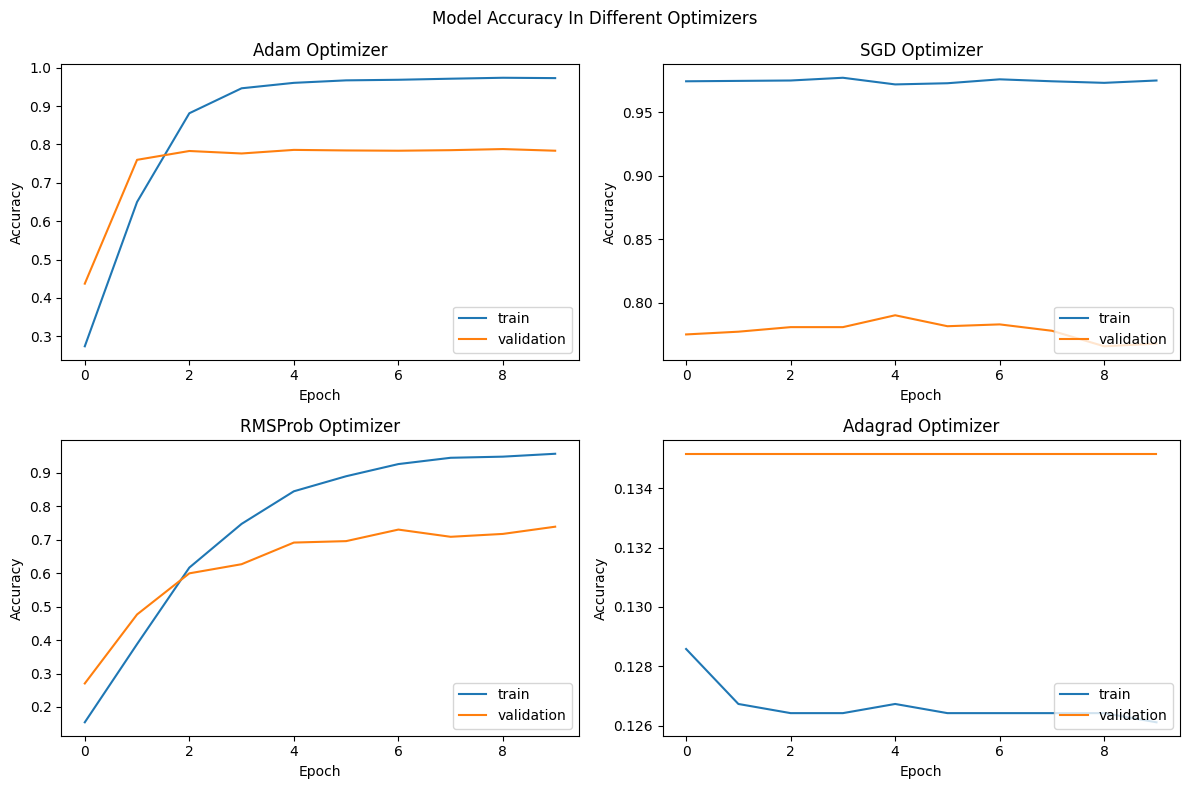

In [46]:
def accuracy_plot():
  fig, axs = plt.subplots(2,2, figsize=(12, 8))
  fig.suptitle("Model Accuracy In Different Optimizers")

  axs[0,0].plot(adam_history.history['accuracy'])
  axs[0,0].plot(adam_history.history['val_accuracy'])
  axs[0,0].legend(['train', 'validation'], loc='lower right')
  axs[0,0].set_xlabel("Epoch")
  axs[0,0].set_ylabel("Accuracy")
  axs[0,0].set_title("Adam Optimizer")

  axs[0,1].plot(sgd_history.history['accuracy'])
  axs[0,1].plot(sgd_history.history['val_accuracy'])
  axs[0,1].legend(['train', 'validation'], loc='lower right')
  axs[0,1].set_xlabel("Epoch")
  axs[0,1].set_ylabel("Accuracy")
  axs[0,1].set_title("SGD Optimizer")

  axs[1,0].plot(rmsprob_history.history['accuracy'])
  axs[1,0].plot(rmsprob_history.history['val_accuracy'])
  axs[1,0].legend(['train', 'validation'], loc='lower right')
  axs[1,0].set_xlabel("Epoch")
  axs[1,0].set_ylabel("Accuracy")
  axs[1,0].set_title("RMSProb Optimizer")

  axs[1,1].plot(adagrad_history.history['accuracy'])
  axs[1,1].plot(adagrad_history.history['val_accuracy'])
  axs[1,1].legend(['train', 'validation'], loc='lower right')
  axs[1,1].set_xlabel("Epoch")
  axs[1,1].set_ylabel("Accuracy")
  axs[1,1].set_title("Adagrad Optimizer")

  fig.tight_layout()
  fig.show()


accuracy_plot()


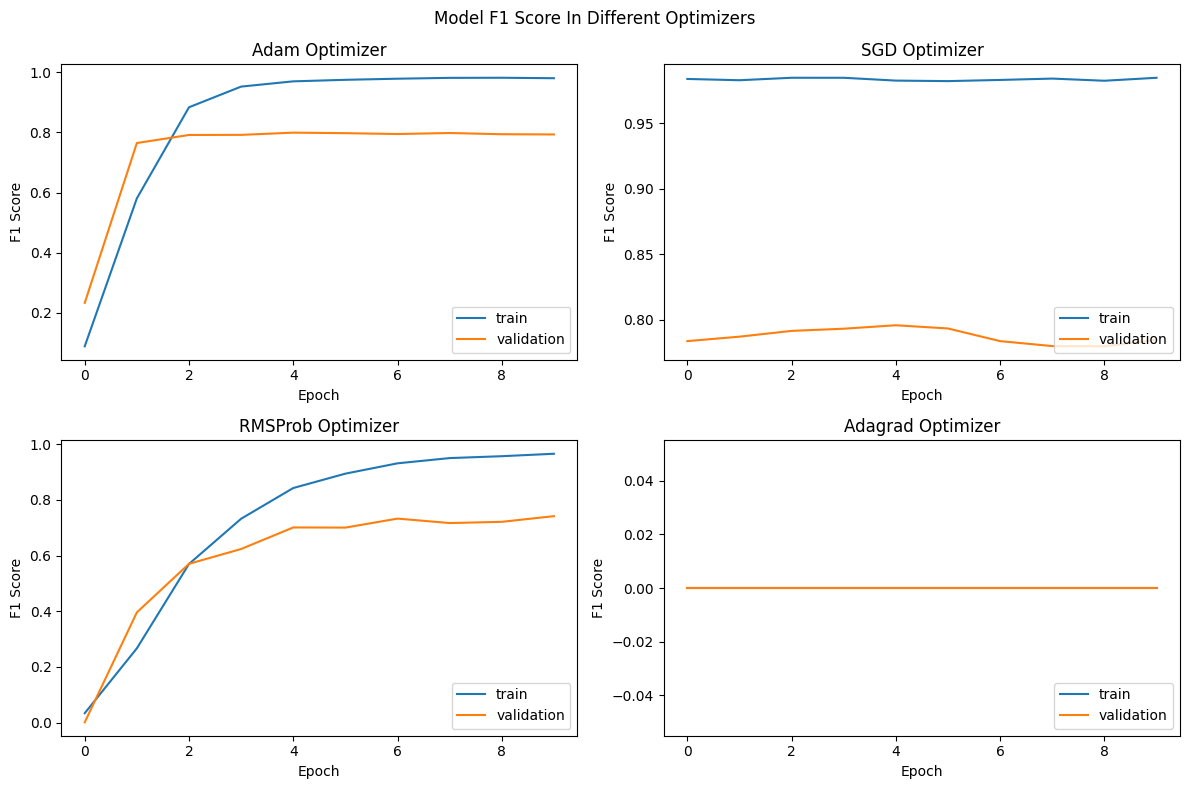

In [47]:
def f1score_plot():
  fig, axs = plt.subplots(2,2, figsize=(12, 8))
  fig.suptitle("Model F1 Score In Different Optimizers")

  axs[0,0].plot(adam_history.history['get_f1'])
  axs[0,0].plot(adam_history.history['val_get_f1'])
  axs[0,0].legend(['train', 'validation'], loc='lower right')
  axs[0,0].set_xlabel("Epoch")
  axs[0,0].set_ylabel("F1 Score")
  axs[0,0].set_title("Adam Optimizer")

  axs[0,1].plot(sgd_history.history['get_f1'])
  axs[0,1].plot(sgd_history.history['val_get_f1'])
  axs[0,1].legend(['train', 'validation'], loc='lower right')
  axs[0,1].set_xlabel("Epoch")
  axs[0,1].set_ylabel("F1 Score")
  axs[0,1].set_title("SGD Optimizer")

  axs[1,0].plot(rmsprob_history.history['get_f1'])
  axs[1,0].plot(rmsprob_history.history['val_get_f1'])
  axs[1,0].legend(['train', 'validation'], loc='lower right')
  axs[1,0].set_xlabel("Epoch")
  axs[1,0].set_ylabel("F1 Score")
  axs[1,0].set_title("RMSProb Optimizer")

  axs[1,1].plot(adagrad_history.history['get_f1'])
  axs[1,1].plot(adagrad_history.history['val_get_f1'])
  axs[1,1].legend(['train', 'validation'], loc='lower right')
  axs[1,1].set_xlabel("Epoch")
  axs[1,1].set_ylabel("F1 Score")
  axs[1,1].set_title("Adagrad Optimizer")

  fig.tight_layout()
  fig.show()


f1score_plot()
